In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
transaction_df = pd.read_csv("transaction_data.csv")
purchase_behaviour_df = pd.read_csv("purchase_behaviour.csv")

In [3]:
# Identify top 3 most profitable products
top_products = (
    transaction_df.groupby("PROD_NAME")["TOT_SALES"]
    .sum()
    .sort_values(ascending=False)
    .head(3)
)

In [4]:
# Merge datasets
merged_df = transaction_df.merge(purchase_behaviour_df, on="LYLTY_CARD_NBR", how="left")

In [5]:
# Identify the most loyal customers
loyal_customers = (
    merged_df.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)
)

In [6]:
# Identify the most common lifestage and premium status among top customers
loyal_customer_segments = (
    loyal_customers.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)
)

C:\Users\acer\AppData\Local\Temp\ipykernel_16652\2191339481.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


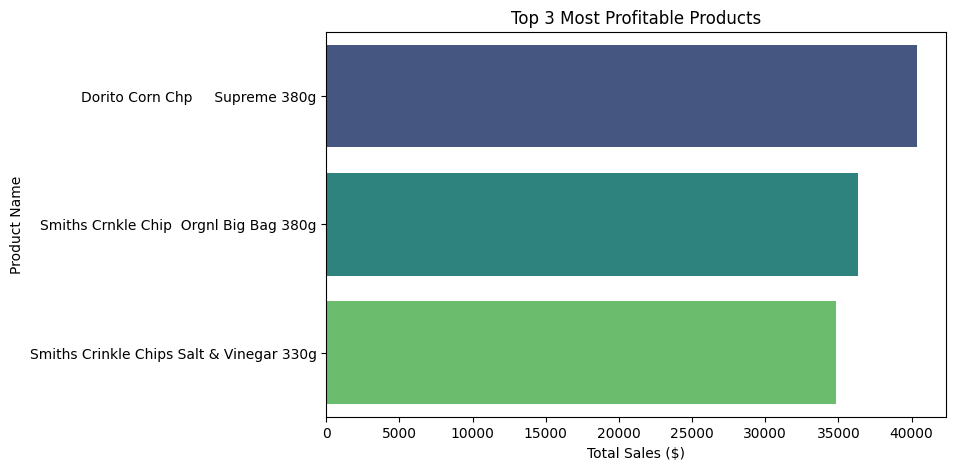

In [7]:
# Plot top 3 profitable products
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Name")
plt.title("Top 3 Most Profitable Products")
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_16652\3798102031.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


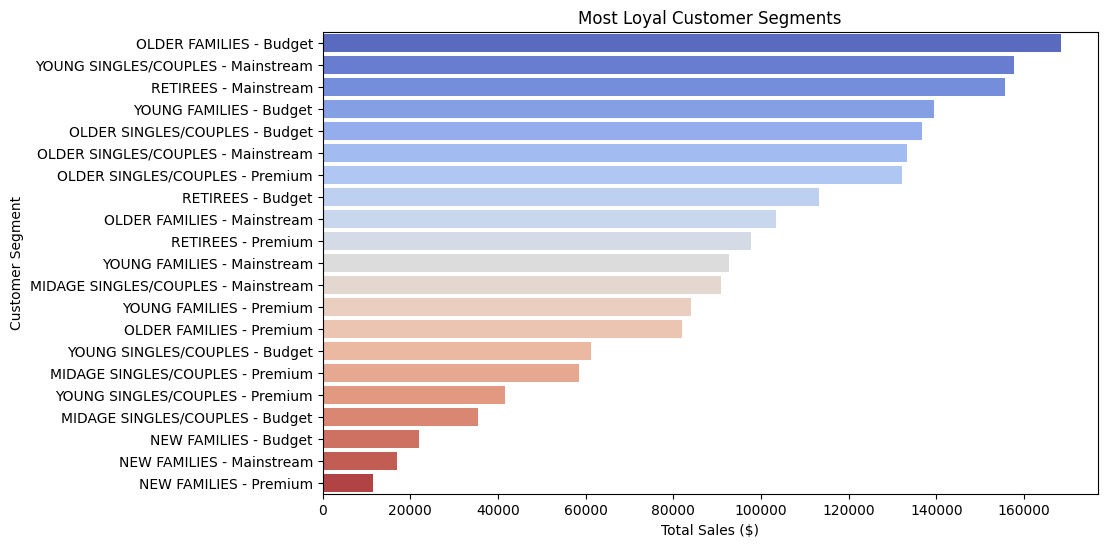

In [8]:
# Plot most loyal customer segments
plt.figure(figsize=(10, 6))
sns.barplot(
    x=loyal_customer_segments["TOT_SALES"], 
    y=loyal_customer_segments["LIFESTAGE"] + " - " + loyal_customer_segments["PREMIUM_CUSTOMER"],
    palette="coolwarm")
plt.xlabel("Total Sales ($)")
plt.ylabel("Customer Segment")
plt.title("Most Loyal Customer Segments")
plt.show()

In [9]:
# Display results
print("Top 3 Most Profitable Products:")
print(top_products)
print("\nMost Loyal Customer Segments:")
print(loyal_customer_segments.head(3))

Top 3 Most Profitable Products:
PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Name: TOT_SALES, dtype: float64

Most Loyal Customer Segments:
                LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
6          OLDER FAMILIES           Budget  168363.25
19  YOUNG SINGLES/COUPLES       Mainstream  157621.60
13               RETIREES       Mainstream  155677.05
